In [1]:
import numpy as np

from sklearn.datasets import load_iris

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

data = load_iris()

X_main = data.data
Y_main = data.target

X_train, X_test, y_train, y_test = train_test_split(X_main,
                                                    Y_main, 
                                                    random_state=42)

In [7]:
class ModelNotFittedError(Exception):
    def __init__(self, text):
        ModelNotFittedError.text = text

In [17]:
class Perceptron(object):

    def __init__(self, eta=0.01 , n_iter=10):
        if (eta <= 0) or (eta >= 1):
            raise ValueError('Eta must be greater than 0 and less than 1')
        self.eta = eta
        self.n_iter = n_iter
        
        self.__is_fitted = False

    def fit(self, X, y): 
        self.__is_fitted = True
        
        self.coef_ = np.zeros(X.shape[1])
        self.intercept_ = 0
        self.errors_ = []
        for _ in range (self.n_iter):
            errors = 0.0
            for xi, target in zip (X, y):
                update = self.eta * (target - self.predict(xi))
                self.coef_       += update * xi
                self.intercept_  += update
                errors           += int(update != 0.0)
            self.errors_.append (errors)
            
        return self

    def net_input(self, X):
        return np.dot(X, self.coef_) + self.intercept_

    def predict (self, X):
        if not self.__is_fitted:
            raise ModelNotFittedError('Model is not fitted.')
        
        result = self.net_input(X)
        
        if result < -2:
            return 0
        elif result > 2:
            return 2
        else:
            return 1
        
    def score(self, X, y):
        results = np.array([self.predict(xi) for xi in X])
        
        return np.sum(results == y) / len(y)

In [25]:
from itertools import permutations

for eta, n_iter in [(eta, n) for eta in [.1, .3, .5] for n in (10, 15, 20)]:
    pr = Perceptron(eta=eta, n_iter=n_iter).fit(X_train, y_train)
    
    print('Perceptron(eta={0}, n_iter={1}). Score:{2}'.format(eta,
                                                              n_iter,
                                                              pr.score(X_test, y_test)))

Perceptron(eta=0.1, n_iter=10). Score:0.7368421052631579
Perceptron(eta=0.1, n_iter=15). Score:0.9473684210526315
Perceptron(eta=0.1, n_iter=20). Score:0.9210526315789473
Perceptron(eta=0.3, n_iter=10). Score:0.7105263157894737
Perceptron(eta=0.3, n_iter=15). Score:0.7894736842105263
Perceptron(eta=0.3, n_iter=20). Score:0.6578947368421053
Perceptron(eta=0.5, n_iter=10). Score:0.6578947368421053
Perceptron(eta=0.5, n_iter=15). Score:0.7105263157894737
Perceptron(eta=0.5, n_iter=20). Score:0.6052631578947368


In [26]:
for C in (0.001, 0.01, 0.1, 1, 10, 100):
    lr = LogisticRegression(C=C).fit(X_train, y_train)
    
    print('LogisticRegression(C={0}). Score:{1}'.format(C,
                                                        lr.score(X_test, y_test)))

LogisticRegression(C=0.001). Score:0.3157894736842105
LogisticRegression(C=0.01). Score:0.7105263157894737
LogisticRegression(C=0.1). Score:0.868421052631579
LogisticRegression(C=1). Score:1.0
LogisticRegression(C=10). Score:1.0
LogisticRegression(C=100). Score:1.0


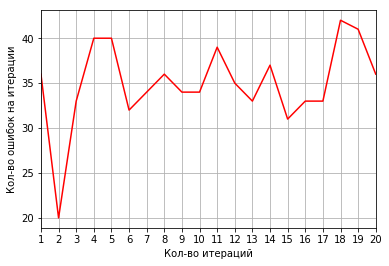

In [32]:
%matplotlib inline
import matplotlib.pyplot as plt

pr = Perceptron(eta=0.2, n_iter=20).fit(X_train, y_train)

errors = pr.errors_

plt.xlabel('Кол-во итераций')
plt.ylabel('Кол-во ошибок на итерации')
plt.xticks(range(1, 21), [str(i) for i in range(1, 21)])
plt.xlim(1, 20)
plt.plot(range(1, 21), errors, color='red')
plt.grid()